# 阅读笔记

** 作者：方跃文 **

** Email: fyuewen@gmail.com **

** 时间：始于2017年9月12日， 结束写作于 **

** 上海纽约大学 **

** 京都大学**



# 第二章 引言

** 时间： 2017年9月12日 **

尽管数据处理的目的和领域都大不相同，但是利用python数据处理时候基本都需要完成如下几个大类的任务：

1) 与外界进行数据交互

2) 准备：对数据进行清理、修整、规范化、重塑、切片切块

3) 转换：对数据集做一些数学和统计运算以产生新的数据集，e.g. 根据分组变量对一个大表进行聚合

4) 建模和计算：将数据跟统计模型、机器学习算法联系起来

5) 展示：创建交换式的或者静态的图片或者文字摘要。


## 来自bit.ly的1.usa.gov数据

ch02中的usagov_bitly_data2012-03-16-1331923249.txt是bit.ly网站收集到的每小时快照数据。文件中的格式为JavaScript Object Notation （JSON)——一种常用的web数据格式。例如如果我们只读取某个文件中的第一行，那么所看到的结果是下面这样：

In [2]:
path = "./pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt"
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

python有许多内置或第三方模块可以将JSON字符转换成python字典对象。这里，我将使用json模块及其loads函数逐行加载已经下载好的数据文件：

In [3]:
import json
path = "./pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line) for line in open(path)] 

上面最后一行表达式，叫做“列表推导式 list comprehension”。这是一种在一组字符串（或一组别的对象）上执行一条相同操作（如json.loads）的简洁方式。在一个打开的文件句柄上进行迭代即可获得一个由行组成的序列。现在，records对象就成为一组python字典了。

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
records[0]['tz']

'America/New_York'

### 用纯Python代码对时区进行排序

现在，我们想对时区进行计数，处理的方法有多种。
我们首先考虑的是利用**列表推导式**取出一组时区：

In [7]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

然而我们发现上面这个出现了‘tz'的keyerror,这是因为并不是所有记录里面都有tz这个字段，为了让程序判断出来，我们需要加上if语句，即

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

我们从上面可以看到，的确有些时区字段是空的。此处，为了对时区进行计算，介绍两种半法。

** 第一种，只使用python标准库**

In [ ]:
#这种方法是在遍历时区的过程中将计数值保留在字典中：

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

非常了解Python标准库的话，可以将上述代码写得更加精简：

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) #所有的值都会被初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

上述两种写法中，都将代码写到了函数中。这样的做法，是为了代码段有更高的可重要性，方便对时区进行处理。此处我们子需要将时区 time_zones 传入即可：

In [12]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']

1251

In [13]:
len(time_zones)

3440

如果要想得到前10位的时区及其计数值，我们需要用到一些有关字典的处理技巧：

In [15]:
def top_counts(count_dict, n =10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

我们还可在python标准库中找到collections.Counter类，它能使这个任务更加简单：

In [16]:
from collections import Counter
counts = Counter(time_zones)

In [18]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

**第二种，用pendas对时区进行计数**

*DataFrame* 是pendas中最重要的数据结构，它用于将数据表示为一个表格。从一组原始记录中创建DataFrames是很简单的：

In [21]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [23]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

这里frame的输出形式是摘要试图(summary view),主要是用于较大的DataFrame对象。frame['tz']所返回的Series对象有一个value_counts方法，该方法可以让我们得到所需的信息：

In [24]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

现在，我们想用matplotlib为这段数据生成一张图片。为此，我们先给记录中未知或缺失的时区天上一个替代值。fillna 函数可以替换缺失值(NA)，而未知值（空字符串）可以通过布尔型数据索引加以替换：

In [26]:
clean_tz = frame['tz'].fillna('Missing')

In [27]:
clean_tz[clean_tz == ''] = 'Unknown'

In [30]:
tz_counts = clean_tz.value_counts()

In [31]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

利用tz_counts对象的plot方法，我们开得到一张水平条形图：

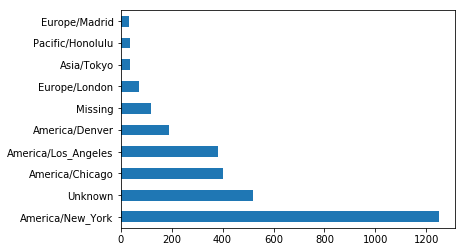

In [33]:
%matplotlib inline
tz_counts[:10].plot(kind='barh', rot=0)